In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math as m
import os
from multiprocessing import Pool
import random as rd
from pathlib import Path
import sys
from scipy.integrate import simps
import itertools
import ReportFunctions as rf

In [2]:
def error_plotter(x,mean,err):
    return plt.errorbar( x,mean,yerr=err,fmt='o')

def label_var(test_var):
    if test_var == 0:
        return "o = "
    if test_var == 1:
        return "b = "
    if test_var == 2:
        return "v0 = "
    if test_var == 3:
        return "T = "
def title_var(test_var):
    if test_var == 0:
        return "variance of noise"
    if test_var == 1:
        return "corridor width [m]"
    if test_var == 2:
        return "desired velocity [m/s]"
    if test_var == 3:
        return "slope of velocity function [s]"

In [3]:
sl = "/"
path = pd.read_csv("path.csv")
path = path['path'][0]

folder_frame = pd.read_csv(path + "folder_list.csv")
folder_list = np.array(folder_frame['ini_folder'])
variables = pd.read_csv(path + "variables_list.csv")

folder = "trajectories/"

b_frame = folder_frame['b']
#rho_ini_frame = pd.read_csv(path + "rho_ini.csv")
#rho_ini = np.array(rho_ini_frame['rho_ini'])
esigma_frame = pd.read_csv(path + "esigma.csv")
esigma = np.array(esigma_frame["esigma"])
T_frame = pd.read_csv(path + "T_list.csv")
T = np.array(T_frame['T'])
print(T)
v0_frame = pd.read_csv(path + "v0_list.csv")
v0 = np.array(v0_frame['v0'])
N_runs = variables['N_runs'][0]
fps = variables['fps'][0]
b = np.array(b_frame)
N_ped = variables['N_ped'][0]
t_max = variables['t_max'][0]
test_var = variables['test_var'][0]
cross_var = rf.Product(np.array([esigma,b,v0,T]))

print("b/2 = ", b)
print("fps = " ,fps)
print("N_runs = ", N_runs)
print("folder_list_0", folder_list[0])
print("folder_list_-1", folder_list[-1])
print("N_ped = ", N_ped)
print("t_max = ", t_max)
if test_var == 0:
    print("test variable esigma")
if test_var == 1:
    print("test variable b")
if test_var == 2:
    print("test variable v0")
print(cross_var)

[1.]
b/2 =  [0.55 0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95 2.   2.05 2.1  2.15 2.2
 2.25 2.3  2.35 2.4  2.45 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4
 1.45 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95 2.5  2.55 2.6
 2.65 2.7  2.75 2.8  2.85 2.9  2.95 3.   3.05 3.1  3.15 3.2  3.25 3.3
 3.35 3.4  3.45 3.5 ]
fps =  16
N_runs =  1
folder_list_0 ini_0m_N_ped60_tmax1950_size_0_2_fps_16_testvar_b/ini_0_55_0m_60_esigma_0_5_tmax_1950_periodic_1_v0_1_34_T_1_0
folder_list_-1 ini_0m_N_ped60_tmax1950_size_0_2_fps_16_testvar_b/ini_3_5_0m_60_esigma_0_5_tmax_1950_periodic_1_v0_1_34_T_1_0
N_ped =  60
t_max =  1950
test variable b
[(0.5, 0.55, 1.34, 1.0), (0.5, 0.6, 1.34, 1.0), (0.5, 0.65, 1.34, 1.0), (0.5, 0.7, 1.34, 1.0), (0.5, 0.75, 1.34, 1.0), (0.5, 0.8, 1.34, 1.0), (0.5, 0.85, 1.34, 1.0), (0.5, 0.9, 1.34, 1.0), (0.5, 0.95, 1.34, 1.0), (0.5, 2.0, 1.34, 1.0), (0.5, 2.05, 1.34, 1.0), (0.5, 2.1, 1.34, 1.0), (0.5, 2.15, 1.34, 1.0), (0.5, 2.2, 1.34, 1.0), (0.5, 2.25, 1.34, 1.0), (0.5, 2.3, 1.34, 1

In [27]:
dens_mean = []
b_new = []
for var in cross_var:
    loc = path + "density_runs"  + "/" +"densities_i_esigma_" + str(var[0]) + "_b_" + str(var[1]) + "_v0_" + str(var[2]) + "_T_" + str(var[3])  + ".csv"
    traj = pd.read_csv(loc)
    if traj.size == 0:
        print("found empty file")
        continue
    b_new.append(var[1])
    dens_mean.append(traj)



found empty file
found empty file
found empty file
found empty file


In [19]:

#dens = [d_m[1] for d_m in np.array(dens_mean)]
c = 0
dens = []
for d_m in dens_mean:
    d = np.array(d_m['0'])
    dens.append(np.array(d))
    #plt.plot(dens)
density_np = np.array(dens)
print(density_np)

[array([2.56402527, 2.57359865, 2.56427154, ..., 1.6114882 , 1.62966725,
       1.59925171])
 array([3.58889188, 3.58810525, 3.55177946, ..., 1.57737948, 1.59734567,
       1.55897986])
 array([3.71312913, 3.68997904, 3.66601651, ..., 1.84195981, 1.82391156,
       1.83565569])
 array([3.82245924, 3.82245924, 3.79717229, ..., 2.32163634, 2.3072579 ,
       2.34178388])
 array([2.76233526, 2.77106314, 2.78790228, ..., 3.14051613, 3.16701361,
       3.13456279])
 array([3.73052203, 3.7145956 , 3.66412736, ..., 2.46053118, 2.44792644,
       2.42580498])
 array([4.19735366, 4.19739276, 4.17729437, ..., 2.7362221 , 2.75197205,
       2.74368132])
 array([4.82882531, 4.77698241, 4.69079667, ..., 3.14553528, 3.13184959,
       3.12775596])
 array([3.25573065, 3.2612958 , 3.283531  , ..., 3.94066223, 3.9551706 ,
       3.95593251])
 array([4.58995405, 4.55662377, 4.5362629 , ..., 4.84054278, 4.83226924,
       4.82997194])
 array([4.08608517, 4.07005742, 4.05892298, ..., 4.51361385, 4.5083552

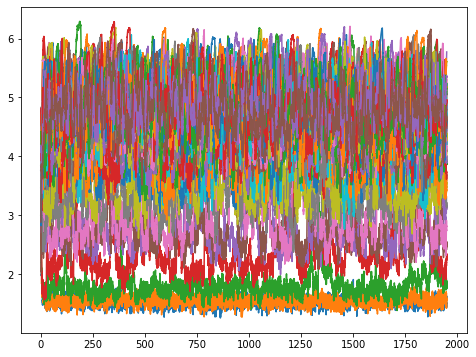

fps =  16
array_min/max =  2400 30400


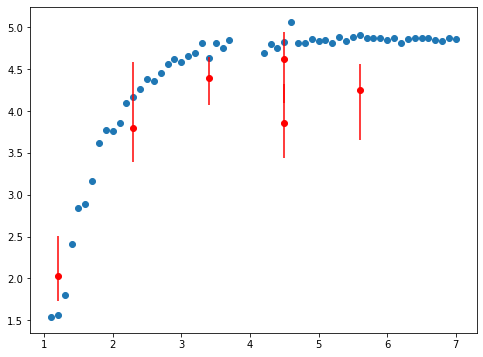

In [65]:
"""den = []
std = []
den2 = []
#rho_ini = np.array(rho_ini_frame['rho_ini'])
b_max = b.max()
b_min = b.min()
var = cross_var[-1]
#density_pd = pd.read_csv(path  + 'dens_mean_Nped_' +str(N_ped) + "_b_" + str(int(200 * b[-1]))+"_v0_" +str(int(100*v0[-1])) + "_tmax_" + str(t_max) +"_N_runs_"+ str(N_runs) + ".csv")
#density_pd = pd.read_csv(path + 'dens_mean_Nped_' +str(N_ped) + "_b_" + str(int(200 * var[1]))+"_v0_" +str(int(100*var[2]))+ "_T_" + str(int(100 * var[3]))  + "_tmax_" + str(t_max) +"_N_runs_"+ str(N_runs) + ".csv")
density_np = []
for key_b , key_count in zip(cross_var,np.arange(1,np.array(cross_var).shape[0] + 1)):
    key_b = round(key_b[test_var],3)
    #print(key_b)
    density_np.append(density_pd[str(key_count)  + ',' + str(key_b)])

density_np = np.array(density_np)
density_hist = density_np
"""
fig, ax = plt.subplots(1, figsize=(8, 6))

for d,var in zip(density_np,cross_var):
    #print(bi)
    #print(d.shape)
    t_array = [i/fps for i in range(d.shape[0] )]
    #bi = round(bi,3)
    plt.plot(t_array,d, label = label_var(test_var) + str(var[test_var]))
#ax.legend(loc="upper right", title=title_var(test_var), frameon=False)

plt.savefig("plots/density_time_series_N_ped_" + str(N_ped) + ".pdf")
plt.show()
#plt.plot(density_pd['1.5'])
#plt.plot(density_pd['1.35'])

#print(density_np[0].shape)
#print(np.array(density)[0].mean())
fig, ax = plt.subplots(1, figsize=(8, 6))
print("fps = ", fps)
min_t = 150
max_t = 1900
array_min = min_t * fps
array_max = max_t * fps
print("array_min/max = ", array_min,array_max)
df = pd.DataFrame(dtype=float)
#density_reduced = np.array([[np.array(den).mean() for den in dens[array_min:array_max]] for dens in density_np])
density_reduced = np.array([ dens[array_min:array_max].mean() for dens in density_np])
plt.scatter(2 * np.array(b_new),density_reduced)
#plt.show()
#cat = np.array([np.array([i for k in den]) for i,den in zip (np.arange(0,np.array(cross_var).shape[0]),density_reduced)])
#print(cat.flatten().shape)
#print(density_reduced.flatten().shape)
#print(cat.flatten().shape)


"""mean = df.groupby('category')['density'].mean()
p025 = df.groupby('category')['density'].quantile(0.025)
p975 = df.groupby('category')['density'].quantile(0.975)

plt.xlabel(title_var(test_var))
plt.ylabel('density [m^-2]')"""
"""

plt.scatter([1.2,2.3,3.4,4.5,5.6],[2.3,3.8,4.,4.3,4.2], label = "Simulation results Ben Hein", color = "orange")
"""

exp_dens = pd.read_csv("exp_results/exp_data.csv")
b22 = [1.2,2.3,3.4,4.5,4.5,5.6]

p1 = np.array(exp_dens['p025'])
p2 = np.array(exp_dens['p975'])
mean_exp =  np.array(exp_dens['mean'])
#err = [mean - p025, p975 - mean]
x = np.array([var[test_var] for var in cross_var])
#if test_var == 1:
 #   x = 2 * x
#error_plotter(x,mean,err)
if test_var == 1:
    plt.errorbar(b22,mean_exp,yerr =[mean_exp - p1, p2 - mean_exp], label = "Experimental results Juliane Adrian", color = "r",fmt='o')

"""
if test_var == 0:
    plt.errorbar(esigma,mean,yerr=err,fmt='o')
if test_var == 1:
    plt.errorbar(2*b,mean,yerr=[mean - p025, p975 - mean],fmt='o')

if test_var == 2:
    plt.errorbar(v0,mean,yerr=[mean - p025, p975 - mean],fmt='o')

plt.title("Results for mean from " + str(min_t) + "-" + str(max_t) + " with N_ped =" + str(N_ped))
ax.legend(loc="upper left", title="Studies", frameon=False)
df_results = pd.DataFrame()
df_results['mean'] = mean
if test_var == 0:
    df_results['esigma'] = esigma
if test_var == 1:
    df_results['b'] = b
if test_var == 2:
    df_results['v0'] = v0
df_results['p975'] = p975 
df_results['p025'] = p025 

df_results.to_csv("mean/results.csv")
mean.to_csv
plot_name = "plots/density/" +  "dens_Nped_" + str(N_ped)+"_time_int_mean_" + str(min_t) + "-" + str(max_t) + "_Nruns_" + str(N_runs) + "_fps_" + str(fps) + "_brange_" + str(b_min) + "_" + str(b_max) + ".pdf" 
plt.savefig(plot_name)
"""
plt.show()

[1.64874791 1.61283448 1.61627992 1.60958239 1.64920408 1.6109259
 1.62330996 1.67367248 1.69287665 1.70843892 1.70731064 1.69292837
 1.64395103 1.65825537 1.6549495  1.67112106 1.69757739 1.66780087
 1.69413896 1.64087533 1.66580789 1.67436955 1.68438793 1.651893
 1.61740478 1.58821136 1.58478599 1.47407979 1.51453869 1.54379556
 1.56045228 1.56675809 1.53733806 1.5290928  1.50964053 1.51211148
 1.53729983 1.56165316 1.53817069 1.57075863 1.6081956  1.57874281
 1.63969793 1.6513884  1.62662006 1.60366327 1.61024475 1.60616519
 1.59645476 1.61772914 1.60441339 1.60511088 1.61666472 1.6209444
 1.67760235 1.70112314 1.71050064 1.69672136 1.72635173 1.72769178
 1.72169465 1.71856157 1.71444258 1.72506606 1.74411539 1.73824137
 1.76785724 1.70712541 1.66989857 1.66618098 1.62398571 1.6207834
 1.57421625 1.57862912 1.61186814 1.62357485 1.55279658 1.56248298
 1.58208279 1.59300664 1.551951   1.59552965 1.61703704 1.60873062
 1.61695846 1.59800204 1.56883234 1.54521818 1.56309047 1.55942095


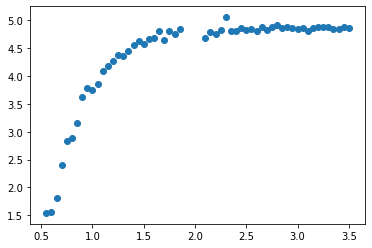

In [61]:
#print(np.array(density_reduced).mean())
print(density_np[0][100:200])
#df['category'] =  cat.flatten()
#df['density'] = density_reduced.flatten()
#print(df.head)


In [14]:
cross_var[:]

[(0.5, 0.6, 1.34, 1.0),
 (0.5, 1.15, 1.34, 1.0),
 (0.5, 1.7, 1.34, 1.0),
 (0.5, 2.25, 1.34, 1.0),
 (0.5, 2.8, 1.34, 1.0)]